### Global imports and loading the data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import explained_variance_score, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split

white_wine_data = pd.read_csv('winequality-white.csv', sep=';')
red_wine_data = pd.read_csv('winequality-red.csv', sep=';')
all_data = pd.concat([white_wine_data, red_wine_data])

In [12]:
def generate_regression_data(wine_type='red', features=None):
    if wine_type == 'red':
        data = red_wine_data
    elif wine_type == 'both':
        data = all_data
    elif wine_type == 'white':
        data = white_wine_data
    else:
        raise Exception ('Invalid selection for wine_type')
    y = data['quality']
    # feature=None corresponds to calculating data for all features
    if features:
        X = data[features]
    else:
        X = data.drop(columns='quality')
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)
    reg = LinearRegression().fit(x_train,y_train)
    prediction = reg.predict(x_test)
    coefficients = reg.coef_
    mse = np.mean((prediction, y_test))
    variance = reg.score(x_test, y_test)
    data = dict(
        feature=X,
        regression=reg,
        prediction=prediction,
        coefficients=coefficients,
        mse=mse,
        variance=variance,
        x_test=x_test,
        x_train=x_train,
        y_test=y_test,
        y_train=y_train,
        features=features,
    )
    return data

def print_data(data):
    """
    Nicely formats data produced by generate_regression_data
    """
    print('Coefficients: \n {}'.format(data['coefficients']))
    print('Mean Squared Error: \n{}'.format(data['mse']))
    print('Variance score: \n{}'.format(data['variance']))
    
def plot_regression(data):
    """
    Plots data from regression model using a single feature
    """
    plt.scatter(data['x_test'], data['y_test'], color='green', label='Test Data')
    plt.scatter(data['x_train'], data['y_train'], color='orange', label='Training Data')
    plt.plot(data['x_test'], data['prediction'], color='blue')
    return plt

#### Generate regression model for each feature independently. First for red and white together, then red only, then white only 

In [3]:
features = list(red_wine_data.columns)
features.remove('quality')

Red and white wine data for feature fixed acidity
Coefficients: 
 [-0.05985686]
Mean Squared Error: 
5.825652606578348
Variance score: 
-0.003477365163371715


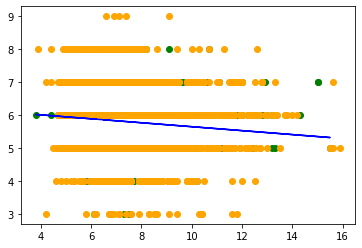

Red and white wine data for feature volatile acidity
Coefficients: 
 [-1.4621359]
Mean Squared Error: 
5.829447532163734
Variance score: 
0.046077243998441486


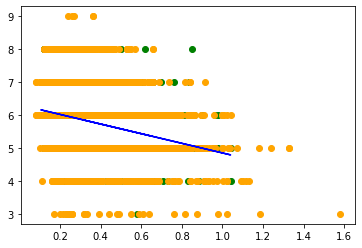

Red and white wine data for feature citric acid
Coefficients: 
 [0.53056221]
Mean Squared Error: 
5.795198089485707
Variance score: 
-0.00248167620533013


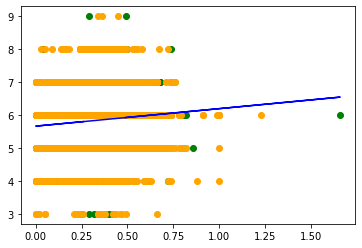

Red and white wine data for feature residual sugar
Coefficients: 
 [-0.00687152]
Mean Squared Error: 
5.824612946863379
Variance score: 
0.0006431225265010054


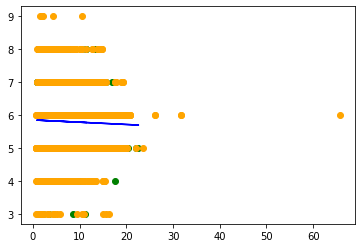

Red and white wine data for feature chlorides
Coefficients: 
 [-4.7985322]
Mean Squared Error: 
5.8245418601804735
Variance score: 
0.049646805686809126


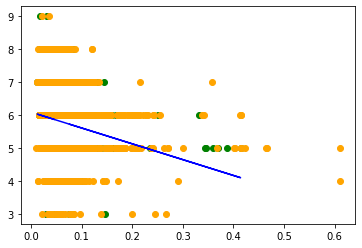

Red and white wine data for feature free sulfur dioxide
Coefficients: 
 [0.00288585]
Mean Squared Error: 
5.829379249602984
Variance score: 
0.00022744846997901913


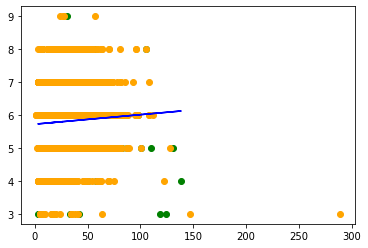

Red and white wine data for feature total sulfur dioxide
Coefficients: 
 [-0.00069124]
Mean Squared Error: 
5.8288467476234
Variance score: 
-0.0011813843311190286


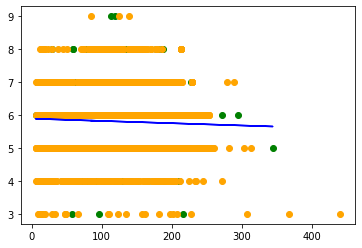

Red and white wine data for feature density
Coefficients: 
 [-88.4328012]
Mean Squared Error: 
5.844351263104613
Variance score: 
0.09320281693347987


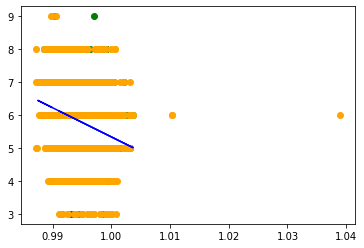

Red and white wine data for feature pH
Coefficients: 
 [0.16221541]
Mean Squared Error: 
5.813982348674249
Variance score: 
-0.00243867684814858


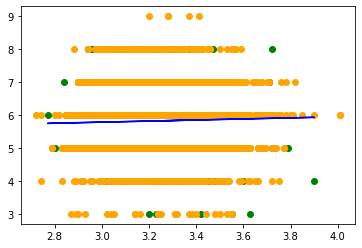

Red and white wine data for feature sulphates
Coefficients: 
 [0.19467009]
Mean Squared Error: 
5.814598312734263
Variance score: 
0.0025413430283823812


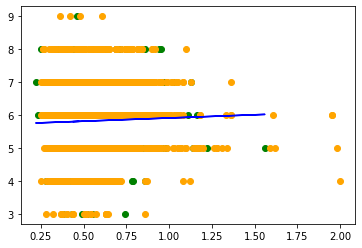

Red and white wine data for feature alcohol
Coefficients: 
 [0.31988598]
Mean Squared Error: 
5.8127510284319355
Variance score: 
0.21982951699844278


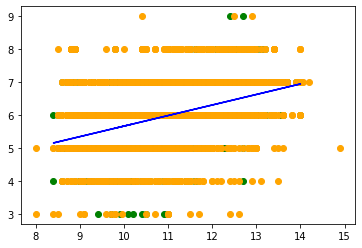

In [4]:
# Red and white wine
for feature in features:
    print('{} data for feature {}'.format('Red and white wine', feature))
    data = generate_regression_data(wine_type='both', features=[feature])
    print_data(data)
    plot = plot_regression(data)
    plot.show()

In [5]:
# Red wine only 
for feature in features:
    print('data for feature {}'.format(feature))
    data = generate_regression_data(wine_type='red', features=[feature])
    print_data(data)
    plot = plot_data(data)
    plot.show()

data for feature fixed acidity
Coefficients: 
 [0.05427781]
Mean Squared Error: 
5.653080792725554
Variance score: 
0.015132514501990602


NameError: name 'plot_data' is not defined

In [ ]:
# White wine only
for feature in features:
    print('data for feature {}'.format(feature))
    data = generate_regression_data(wine_type='white', features=[feature])
    print_data(data)
    #plot = plot_data(data)
    #plot.show()

#### Check if our regression models against correlation values

In [ ]:
# Red and white wine
all_data.corr()['quality'].drop('quality').sort_values(ascending=False)

The 3 strongest correlations (alcohol, density, and volatile acidity) match the 3 regression models with the highest variance, which is what we expect.

In [ ]:
# Red wine only
red_wine_data.corr()['quality'].drop('quality').sort_values(ascending=False)

The 3 strongest correlations (alcohol, volatile acidity, and sulphate) match the 3 regression models with the highest variance, which is what we expect.

In [ ]:
# White wine only
white_wine_data.corr()['quality'].drop('quality').sort_values(ascending=False)

The 3 strongest correlations (alcohol, density, and chlorides) match the 3 regression models with the highest variance, which is what we expect.

In [ ]:
data = generate_regression_data(wine_type='red', features=['alcohol', 'sulphates', 'citric acid', 'volatile acidity'])
print_data(data)

In [ ]:
data = generate_regression_data(wine_type='white', features=['alcohol', 'density'])
print_data(data)

In [6]:
data = generate_regression_data(wine_type='white')
print_data(data)

Coefficients: 
 [ 1.16310773e-01 -1.90364000e+00  1.27825528e-02  1.11501734e-01
  4.37310564e-01  3.44290604e-03 -1.02032154e-04 -2.29813280e+02
  9.18066604e-01  7.11865006e-01  1.06123193e-01]
Mean Squared Error: 
5.865857354277014
Variance score: 
0.22712462784406784


In [7]:
data = generate_regression_data(wine_type='both')
print_data(data)

Coefficients: 
 [ 6.57921188e-02 -1.34889719e+00 -1.26103456e-01  4.16722998e-02
 -6.17544908e-01  5.81631147e-03 -2.44224308e-03 -5.42401363e+01
  4.31545012e-01  7.73494141e-01  2.66964449e-01]
Mean Squared Error: 
5.8189859581878185
Variance score: 
0.27831594134099824


In [8]:

both_features = ['alcohol', 'density', 'volatile acidity', 'chlorides']
red_features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'chlorides', 'density', 'total sulfur dioxide', 'volatile acidity']
white_features = ['alcohol', 'density', 'chlorides', 'volatile acidity', 'total sulfur dioxide', 'fixed acidity']


In [14]:
import itertools
combos = []
data_dict = {}
for l in range(0, len(both_features)+1):
    for subset in itertools.combinations(both_features, l):
        combos.append(subset)
for combo in combos:
    data = generate_regression_data('both', features=list(combo))
    data_dict[combo] = data

In [22]:
from operator import attrgetter
a = max(data_dict, key=lambda tup: data_dict[tup]['variance'])

In [23]:
a

('alcohol', 'density', 'volatile acidity')

In [24]:
data_dict[a]['variance']

0.29219826595761167